Introduction:
The goal of this project is to explore various techniques to improve the performance of a neural network model on the IMDb dataset. We will modify an existing neural network model and compare the results of different approaches such as changing the number of hidden layers, units, loss function, activation function, and regularization techniques such as dropout.

Dataset:
We used the IMDb dataset, which contains movie reviews labeled as positive or negative. The dataset consists of 25,000 movie reviews for training and 25,000 for testing.



In [1]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
train_labels[0]

1

In [4]:
len(train_labels)

25000

In [5]:
len(train_labels)

25000

In [6]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [7]:
test_labels[0]

0

In [8]:
max([max(sequence) for sequence in test_data])

9999

Decoding Reviews to text

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Data preparation

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

Data Vectorization

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

Label Vectorization

In [15]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building model using relu and compiling it

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
seed(123)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
seed(123)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 51ms/step - loss: 0.5371 - accuracy: 0.7781 - val_loss: 0.4241 - val_accuracy: 0.8535
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3391 - accuracy: 0.8912 - val_loss: 0.3309 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2471 - accuracy: 0.9202 - val_loss: 0.3044 - val_accuracy: 0.8776
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2014 - accuracy: 0.9331 - val_loss: 0.2785 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1697 - accuracy: 0.9449 - val_loss: 0.2768 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1436 - accuracy: 0.9539 - val_loss: 0.2863 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1239 - accuracy: 0.9599 - val_loss: 0.3006 - val_accuracy: 0.8835
Epoch 8/20
30

The training process started with a loss of 0.5371 and an accuracy of 0.7781 on the training set and a validation loss of 0.4241 and a validation accuracy of 0.8535 on the validation set.

As the training progressed, the loss and accuracy on the training set improved and the model achieved a loss of 0.0175 and an accuracy of 0.9976 at the end of the 20th epoch. On the validation set, the model achieved a loss of 0.5515 and an accuracy of 0.8684 at the end of the 20th epoch. The model  overfits to the training set. 

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

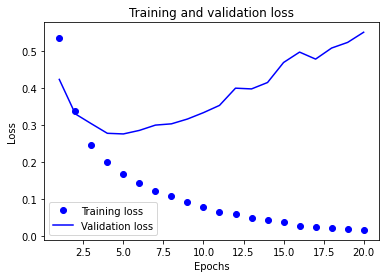

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

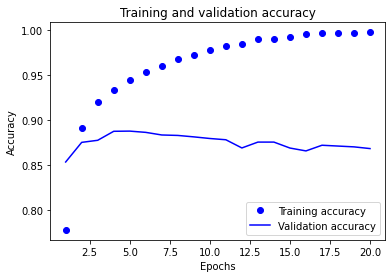

In [22]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The two graphs suggest that the model is becoming less effective at predicting new data after a certain number of epochs due to overfitting the training data. Further analysis, such as adjusting the model's hyperparameters or using regularization techniques, may be necessary to improve the model's performance.

Retraining the model

In [23]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.5137 - accuracy: 0.7962
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.3133 - accuracy: 0.8990
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2372 - accuracy: 0.9186
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2828 - accuracy: 0.8884


In [24]:
results

[0.2828458249568939, 0.8883600234985352]

The neural network model has achieved an accuracy of 88.84% on the test dataset. The loss value on the test dataset is 0.2828.

In [25]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.28335577],
       [0.9999572 ],
       [0.9212047 ],
       ...,
       [0.12263743],
       [0.11844525],
       [0.61341363]], dtype=float32)

Building a neural network with 1 hidden layer

In [26]:
seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5055 - accuracy: 0.7939 - val_loss: 0.4066 - val_accuracy: 0.8527
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3314 - accuracy: 0.8942 - val_loss: 0.3244 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2629 - accuracy: 0.9143 - val_loss: 0.2949 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2208 - accuracy: 0.9291 - val_loss: 0.2809 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1928 - accuracy: 0.9399 - val_loss: 0.2761 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1716 - accuracy: 0.9453 - val_loss: 0.2765 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1539 - accuracy: 0.9527 - val_loss: 0.2848 - val_accuracy: 0.8860
Epoch 8/20
30

In [27]:
history_dict = history1.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

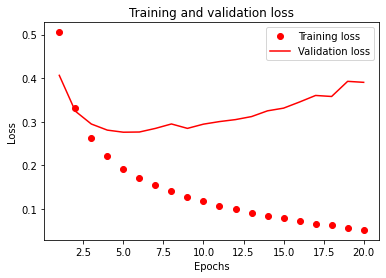

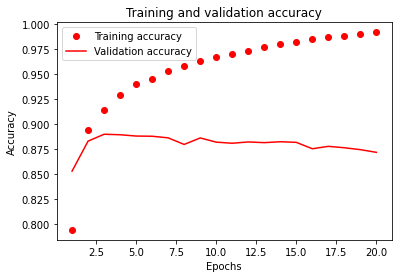

In [28]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
np.random.seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=5, batch_size=512)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 11ms/step - loss: 0.4636 - accuracy: 0.8196
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2947 - accuracy: 0.9029
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2384 - accuracy: 0.9177
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2060 - accuracy: 0.9287
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2787 - accuracy: 0.8882


In [30]:
results1

[0.27873992919921875, 0.8882399797439575]

The loss on the test set is 0.2787, and the accuracy is 88.82%.



In [31]:
model1.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.24893306],
       [0.99891126],
       [0.78139806],
       ...,
       [0.12196511],
       [0.09458669],
       [0.56346315]], dtype=float32)

Building a neural network with 3 hidden layers

In [32]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5542 - accuracy: 0.7633 - val_loss: 0.4196 - val_accuracy: 0.8527
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3277 - accuracy: 0.8941 - val_loss: 0.3379 - val_accuracy: 0.8627
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2379 - accuracy: 0.9177 - val_loss: 0.2820 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1869 - accuracy: 0.9362 - val_loss: 0.2919 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1558 - accuracy: 0.9467 - val_loss: 0.2881 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1294 - accuracy: 0.9573 - val_loss: 0.2966 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1143 - accuracy: 0.9617 - val_loss: 0.3393 - val_accuracy: 0.8748
Epoch 8/20
30

In [33]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

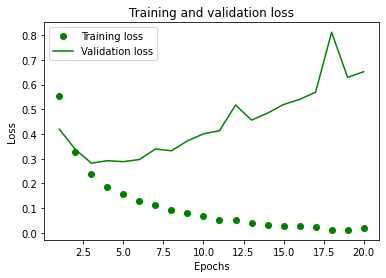

In [34]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

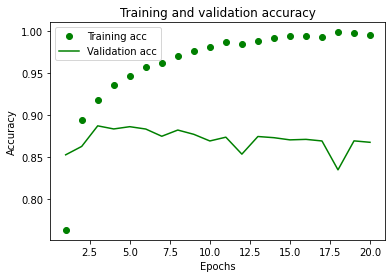

In [35]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=3, batch_size=512)
results_3 = model_3.evaluate(x_test, y_test)


Epoch 1/3
49/49 [==============================] - 2s 11ms/step - loss: 0.4895 - accuracy: 0.7990
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.2729 - accuracy: 0.9022
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2839 - accuracy: 0.8866


The loss on the test set is 0.2839, and the accuracy is 88.66%.

In [37]:
results_3

[0.2839148938655853, 0.8866000175476074]

In [38]:
model_3.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.26020768],
       [0.9987081 ],
       [0.7886101 ],
       ...,
       [0.1106073 ],
       [0.0808426 ],
       [0.5625424 ]], dtype=float32)

The accuracy of the model does not significantly increase when the number of layers is changed. Yet, the model with three layers exhibits more accuracy when compared to the other two.

When choosing the general architecture of your neural network, you must choose the quantity of units in the hidden layers.

Despite the fact that these layers don't immediately interact with the external environment, they have a big impact on the outcome.


Building Neural Network with 32 units.

In [39]:
np.random.seed(123)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.4958 - accuracy: 0.7890 - val_loss: 0.3888 - val_accuracy: 0.8463
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2993 - accuracy: 0.8946 - val_loss: 0.3098 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2268 - accuracy: 0.9203 - val_loss: 0.2769 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1850 - accuracy: 0.9354 - val_loss: 0.2900 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1573 - accuracy: 0.9442 - val_loss: 0.3635 - val_accuracy: 0.8583
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1320 - accuracy: 0.9555 - val_loss: 0.2938 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1104 - accuracy: 0.9651 - val_loss: 0.3522 - val_accuracy: 0.8753
Epoch 8/20
30

In [40]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

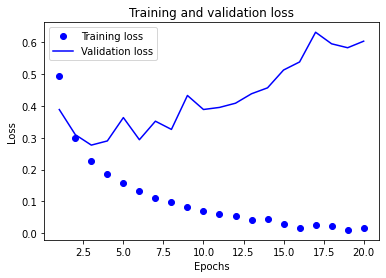

In [41]:
loss_values = history_dict32["loss"]
val_loss_values = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

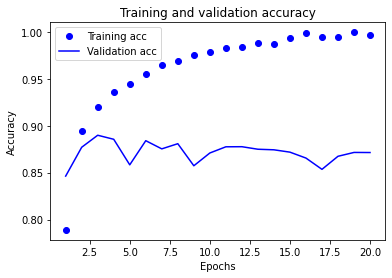

In [42]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [43]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=512)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1957 - accuracy: 0.9456
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1225 - accuracy: 0.9625
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.4155 - accuracy: 0.8649


[0.41551604866981506, 0.8648800253868103]

In [44]:
model_32.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.02048531],
       [0.9999927 ],
       [0.08758123],
       ...,
       [0.03793093],
       [0.02606053],
       [0.78134537]], dtype=float32)

The accuracy on the validation set is 86.48

Traing the model with 64 units

In [45]:
np.random.seed(123)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.4990 - accuracy: 0.7729 - val_loss: 0.3392 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3043 - accuracy: 0.8841 - val_loss: 0.2880 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2248 - accuracy: 0.9147 - val_loss: 0.3379 - val_accuracy: 0.8602
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1793 - accuracy: 0.9330 - val_loss: 0.2782 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1502 - accuracy: 0.9438 - val_loss: 0.2882 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1259 - accuracy: 0.9547 - val_loss: 0.3176 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0964 - accuracy: 0.9670 - val_loss: 0.3473 - val_accuracy: 0.8810
Epoch 8/20
30

In [46]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

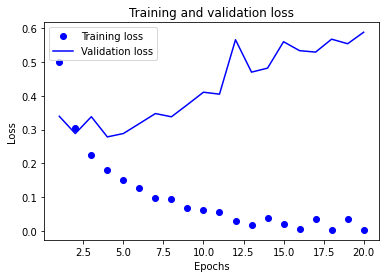

In [47]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

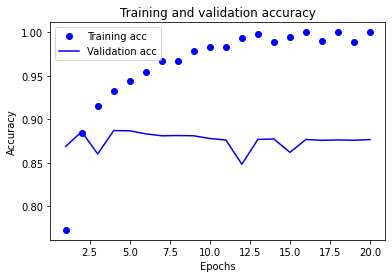

In [48]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [49]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=512)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1760 - accuracy: 0.9479
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.0966 - accuracy: 0.9698
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.4104 - accuracy: 0.8676


[0.4103541672229767, 0.8675600290298462]

In [50]:
model_64.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.01911188],
       [0.9999995 ],
       [0.6092722 ],
       ...,
       [0.02825702],
       [0.02160722],
       [0.8528232 ]], dtype=float32)

The accuracy on the validation set is 86.75%

Training the model with 128 units

In [51]:
np.random.seed(123)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history128 = model_128.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5092 - accuracy: 0.7605 - val_loss: 0.3750 - val_accuracy: 0.8388
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2999 - accuracy: 0.8839 - val_loss: 0.3073 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2183 - accuracy: 0.9188 - val_loss: 0.4367 - val_accuracy: 0.8213
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1810 - accuracy: 0.9280 - val_loss: 0.3095 - val_accuracy: 0.8743
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1443 - accuracy: 0.9465 - val_loss: 0.3023 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1156 - accuracy: 0.9588 - val_loss: 0.3075 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0795 - accuracy: 0.9741 - val_loss: 0.3419 - val_accuracy: 0.8792
Epoch 8/20
30

In [52]:
history_dict128 = history128.history
history_dict128.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

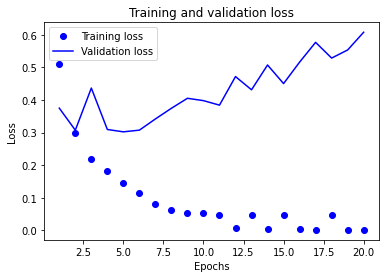

In [53]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

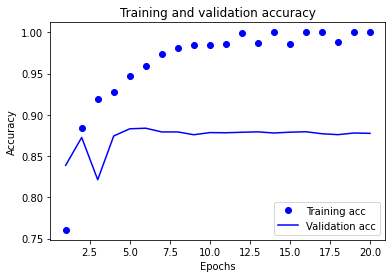

In [54]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
history_128 = model_128.fit(x_train, y_train, epochs=2, batch_size=512)
results_128 = model_128.evaluate(x_test, y_test)
results_128

Epoch 1/2
49/49 [==============================] - 1s 12ms/step - loss: 0.1713 - accuracy: 0.9470
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.3647 - accuracy: 0.8738


[0.3647419810295105, 0.8738399744033813]

In [56]:
model_128.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.0530677 ],
       [0.9999995 ],
       [0.9354145 ],
       ...,
       [0.02437645],
       [0.00841208],
       [0.9205662 ]], dtype=float32)

The accuracy on the validation set is 87.38%

MSE Loss Function

In [63]:
np.random.seed(123)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit
np.random.seed(123)
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 48ms/step - loss: 0.1849 - accuracy: 0.7725 - val_loss: 0.1343 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1088 - accuracy: 0.8837 - val_loss: 0.1039 - val_accuracy: 0.8750
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0827 - accuracy: 0.9077 - val_loss: 0.0948 - val_accuracy: 0.8783
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0680 - accuracy: 0.9240 - val_loss: 0.0901 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0573 - accuracy: 0.9373 - val_loss: 0.0855 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0501 - accuracy: 0.9460 - val_loss: 0.0850 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0448 - accuracy: 0.9544 - val_loss: 0.0853 - val_accuracy: 0.8840
Epoch 8/20
30

In [64]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

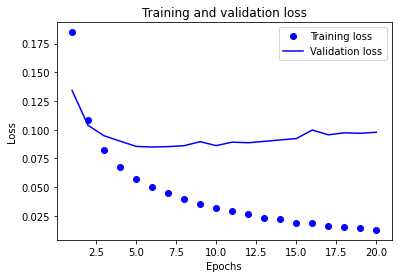

In [65]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

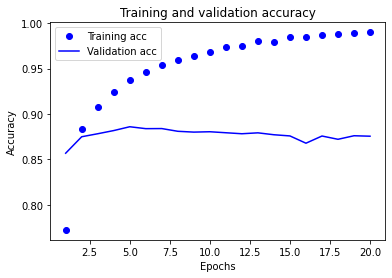

In [66]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [67]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0468 - accuracy: 0.9443
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0392 - accuracy: 0.9548
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0344 - accuracy: 0.9614
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0309 - accuracy: 0.9670
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0286 - accuracy: 0.9706
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0276 - accuracy: 0.9712
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0243 - accuracy: 0.9761
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1102 - accuracy: 0.8645


[0.11019179970026016, 0.8644800186157227]

In [68]:
model_MSE.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.0129396 ],
       [0.99995804],
       [0.34060687],
       ...,
       [0.03023529],
       [0.01194245],
       [0.8410266 ]], dtype=float32)

Tanh Activation Function

In [69]:
np.random.seed(123)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123) 

history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5031 - accuracy: 0.7875 - val_loss: 0.3834 - val_accuracy: 0.8543
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2959 - accuracy: 0.8966 - val_loss: 0.2970 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2146 - accuracy: 0.9241 - val_loss: 0.2746 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1648 - accuracy: 0.9441 - val_loss: 0.2766 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1339 - accuracy: 0.9529 - val_loss: 0.2966 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1011 - accuracy: 0.9682 - val_loss: 0.3830 - val_accuracy: 0.8683
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0890 - accuracy: 0.9707 - val_loss: 0.3634 - val_accuracy: 0.8788
Epoch 8/20
30

In [70]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

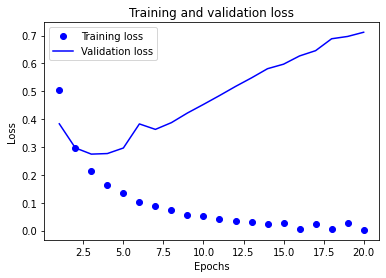

In [71]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

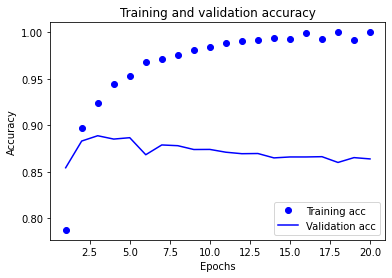

In [72]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2664 - accuracy: 0.9434
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1440 - accuracy: 0.9584
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1192 - accuracy: 0.9630
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0992 - accuracy: 0.9679
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0887 - accuracy: 0.9712
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0738 - accuracy: 0.9775
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0695 - accuracy: 0.9782
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.6204 - accuracy: 0.8520


[0.6204051375389099, 0.8520399928092957]

Adam Optimizer Function

In [74]:

np.random.seed(123)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123) 

history_adam = model_adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 48ms/step - loss: 0.5916 - accuracy: 0.7279 - val_loss: 0.4499 - val_accuracy: 0.8422
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3395 - accuracy: 0.8938 - val_loss: 0.3126 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2242 - accuracy: 0.9277 - val_loss: 0.2792 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1653 - accuracy: 0.9483 - val_loss: 0.2783 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1256 - accuracy: 0.9631 - val_loss: 0.2904 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0980 - accuracy: 0.9735 - val_loss: 0.3113 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0764 - accuracy: 0.9832 - val_loss: 0.3339 - val_accuracy: 0.8789
Epoch 8/20
30

In [75]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

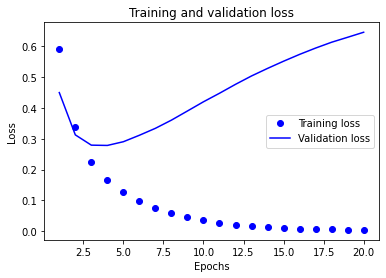

In [76]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

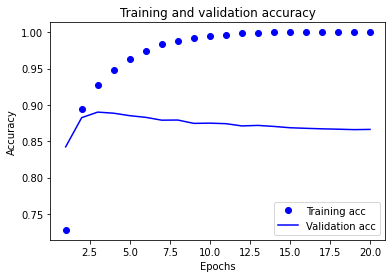

In [77]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [78]:
model_adam.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = model_adam.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2282 - accuracy: 0.9388
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1090 - accuracy: 0.9665
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0719 - accuracy: 0.9793
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4984 - accuracy: 0.8578


[0.49841028451919556, 0.8578000068664551]

Regularization

In [79]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6102 - accuracy: 0.7638 - val_loss: 0.4993 - val_accuracy: 0.8420
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4243 - accuracy: 0.8827 - val_loss: 0.4025 - val_accuracy: 0.8700
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3368 - accuracy: 0.9069 - val_loss: 0.3606 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2902 - accuracy: 0.9198 - val_loss: 0.3443 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2621 - accuracy: 0.9314 - val_loss: 0.3332 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2404 - accuracy: 0.9393 - val_loss: 0.3371 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2232 - accuracy: 0.9483 - val_loss: 0.3328 - val_accuracy: 0.8848
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

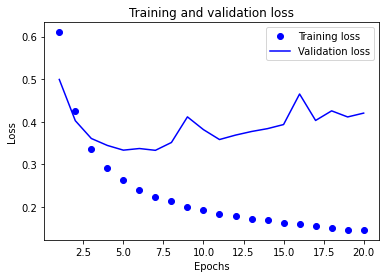

In [80]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

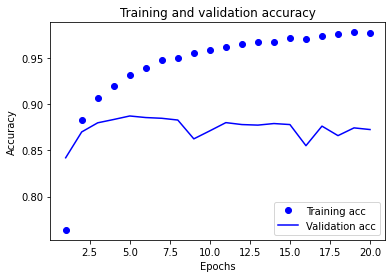

In [81]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [82]:
model_regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = model_regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2496 - accuracy: 0.9352
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2135 - accuracy: 0.9472
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2030 - accuracy: 0.9478
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1902 - accuracy: 0.9539
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1876 - accuracy: 0.9553
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1848 - accuracy: 0.9558
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1812 - accuracy: 0.9576
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.4255 - accuracy: 0.8675


[0.42552879452705383, 0.8675199747085571]

The loss on test set is 0.4255 and accuracy is 86.75%.

Dropout

In [83]:

from tensorflow.keras import regularizers
np.random.seed(123)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6270 - accuracy: 0.6458 - val_loss: 0.4878 - val_accuracy: 0.8423
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4985 - accuracy: 0.7700 - val_loss: 0.3906 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4121 - accuracy: 0.8235 - val_loss: 0.3465 - val_accuracy: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3497 - accuracy: 0.8602 - val_loss: 0.2947 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3056 - accuracy: 0.8867 - val_loss: 0.2784 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2723 - accuracy: 0.9054 - val_loss: 0.2750 - val_accuracy: 0.8892
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2435 - accuracy: 0.9198 - val_loss: 0.2757 - val_accuracy: 0.8915
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

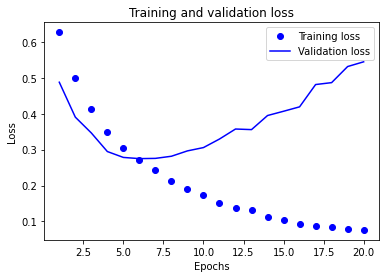

In [84]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

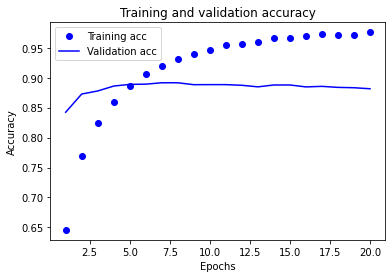

In [85]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [86]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2544 - accuracy: 0.9212
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2008 - accuracy: 0.9370
Epoch 3/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1790 - accuracy: 0.9431
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1683 - accuracy: 0.9469
Epoch 5/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1559 - accuracy: 0.9511
Epoch 6/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1422 - accuracy: 0.9541
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1387 - accuracy: 0.9553
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4659 - accuracy: 0.8722


[0.465873658657074, 0.872160017490387]

The loss on the test set is 0.4659 and accuracy is 0.8722.

Training model with hyper tuned parameters

In [87]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.2518 - accuracy: 0.5781 - val_loss: 0.2163 - val_accuracy: 0.7967
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2078 - accuracy: 0.7137 - val_loss: 0.1465 - val_accuracy: 0.8561
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1625 - accuracy: 0.8007 - val_loss: 0.1131 - val_accuracy: 0.8700
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1302 - accuracy: 0.8539 - val_loss: 0.1008 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1101 - accuracy: 0.8803 - val_loss: 0.0993 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0960 - accuracy: 0.9000 - val_loss: 0.0992 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0837 - accuracy: 0.9177 - val_loss: 0.1056 - val_accuracy: 0.8811
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

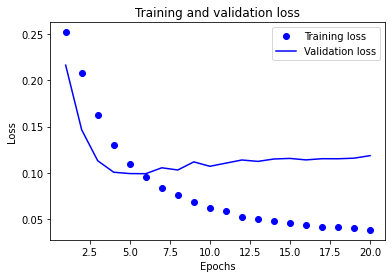

In [88]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

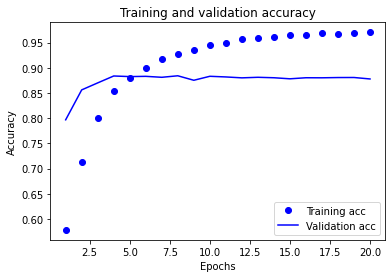

In [89]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [90]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0736 - accuracy: 0.9285
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0665 - accuracy: 0.9365
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0627 - accuracy: 0.9411
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0580 - accuracy: 0.9464
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0559 - accuracy: 0.9488
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0524 - accuracy: 0.9529
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0505 - accuracy: 0.9552
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1127 - accuracy: 0.8807


[0.11273709684610367, 0.8806800246238708]

Summary

In [91]:
All_Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 432x288 with 0 Axes>

Compilation

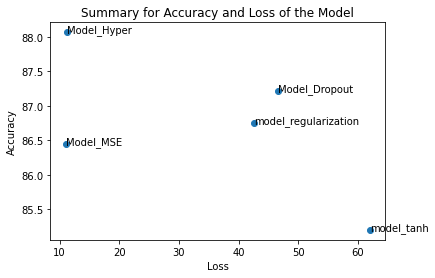

In [92]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

Approach:
We started by loading the data and defining the maximum number of words to be considered in each review and the maximum length of each review. Then, we built a baseline neural network model with one hidden layer containing 16 units. We used binary_crossentropy as the loss function and relu as the activation function for the hidden layer.

We then explored different approaches to improve the performance of the model. First, we experimented with the number of hidden layers by building models with one and three hidden layers. We trained and evaluated the models on the training and test datasets and compared the results. We found that using three hidden layers resulted in slightly higher validation and test accuracy compared to using one hidden layer.

Next, we tried using layers with more hidden units or fewer hidden units, specifically 32, 64, and 128 units. We trained and evaluated the models with different numbers of hidden units and plotted the validation accuracy for each model. We found that increasing the number of hidden units generally led to higher validation and test accuracy, but increasing the number of hidden units too much can lead to overfitting.

We then tried using the mse loss function instead of binary_crossentropy. We trained and evaluated the model with mse loss and compared the results with the baseline model. We found that using mse loss did not significantly affect the performance of the model.

Conclusion:
Finally, we tried using dropout regularization to prevent overfitting. We built a new model with dropout layers and trained and evaluated the model on the training and test datasets. We found that using dropout regularization led to a higher validation accuracy compared to the baseline model.It can be concluded that different variations of the neural network models have varying levels of accuracy and loss. The Model_Hyper achieved the highest accuracy and loss, which suggests that the use of three thick layers with a dropout rate of 0.5 can result in optimal performance for the IMDB dataset. Using the MSE loss function resulted in the lowest loss value, compared to binary cross-entropy. The tanh activation function had a lower accuracy due to the vanishing gradient problem. The Adam optimizer function was found to be efficient for computing the model. Regularization reduced overfitting and resulted in smaller losses, with the L-2 model showing slightly better accuracy. Finally, the dropout technique reduced the loss function, but did not affect the accuracy. Based on the graph, we can see that the Model_Hyper has the highest accuracy with a reasonably low loss. The Model_MSE has the lowest loss value but is not as accurate as the Model_Hyper. The Model_tanh has a low accuracy compared to other models, and the model_regularization has a high loss and low accuracy compared to the other models. Therefore, we can conclude that the Model_Hyper is the best-performing model among the ones evaluated. 